In [15]:
import lda
from scipy import sparse
import numpy as np
import json
import sklearn.mixture

In [2]:
X_train = sparse.load_npz('/Users/tingchen/Desktop/Yelp Project/data/X_train.npz')
cc= np.load("/Users/tingchen/Desktop/Yelp Project/data/y_train.npy")

In [3]:
locs = []
with open("/Users/tingchen/Desktop/Yelp Project/locs_train.json", 'r') as file:
    locs = json.load(file)

In [31]:
dpgmm = sklearn.mixture.BayesianGaussianMixture(verbose=1, n_components=10, max_iter=500)

In [32]:
regions = dpgmm.fit_predict(np.array(locs))

Initialization 0
Initialization converged: True


In [41]:
regions_locs = {i:[] for i in range(5)}

for i, reg in enumerate(list(regions)):
    regions_locs[reg].append(locs[i])
    

In [16]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(locs)
fig = px.scatter_geo(df, lat=0, lon=1, scope="usa") 

In [19]:
import subprocess

In [21]:
subprocess.Popen(["orca", "serve", "-p", "8123", "–plotly plotly.min.js", "–graph-only", "–mathjax", "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js", "–mapbox-access-token", "tokentokentokentokentoken", "–keep-alive"], stdout=subprocess.PIPE, shell=True)

In [22]:
fig.write_image("fig1.png")

ValueError: 
For some reason plotly.py was unable to communicate with the
local orca server process, even though the server process seems to be running.

Please review the process and connection information below:

orca status
-----------
    state: running
    executable: /usr/local/bin/orca
    version: 1.3.1
    port: 65419
    pid: 53287
    command: ['/usr/local/bin/orca', 'serve', '-p', '65419', '--plotly', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/package_data/plotly.min.js', '--graph-only', '--mathjax', 'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js']




In [23]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [42]:
gdf_regions = {}

for key in regions_locs.keys():
    df = pd.DataFrame(regions_locs[key], columns= ['lat', 'long'])
    gdf_regions[key] = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat))

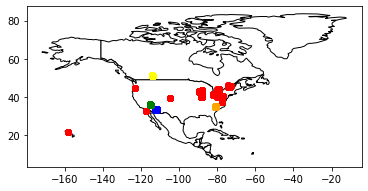

In [44]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')


colors= ['red', 'blue', 'green', 'yellow', 'orange']

for key, val in gdf_regions.items():
    val.plot(ax=ax, color=colors[key])

plt.show()